In [129]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [109]:
wine = pd.read_csv("wine.csv")

In [110]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [111]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [112]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [113]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [114]:
wine[wine["type"]=="red"].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [115]:
wine[wine["type"]=="white"].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [116]:
for col in wine.columns:
    if wine[col].dtypes =="float":
        wine[col].fillna(wine.groupby("type")[col].transform("mean"), inplace=True)

(11.0, 0.0)

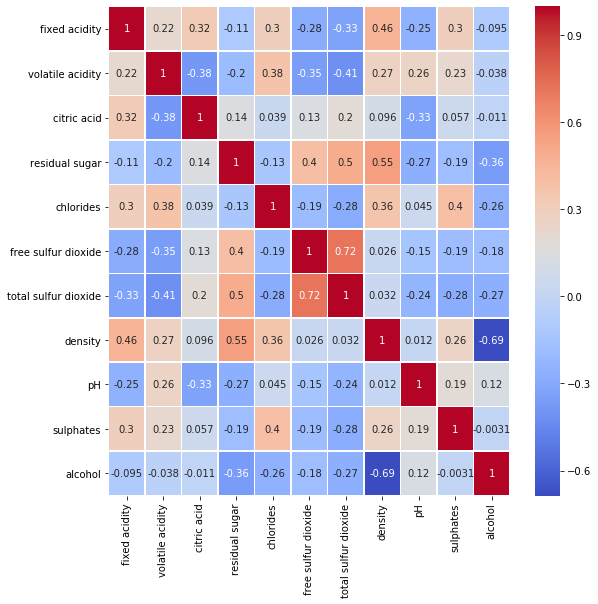

In [166]:
plt.figure(figsize = (9,9))
ax = sns.heatmap(wine.corr(), annot=True, linewidths=.5, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [118]:
wine["quality_level"] = np.where(wine["quality"] < 6, "Bad", 
                                 np.where(wine["quality"] < 8, "Not Bad", "Good"))

wine.drop("quality", axis=1, inplace=True)

In [119]:
wine.quality_level.value_counts()

Not Bad    3915
Bad        2384
Good        198
Name: quality_level, dtype: int64

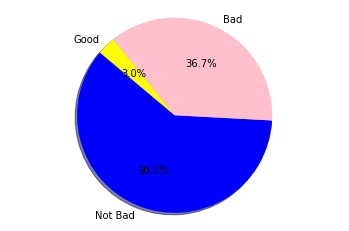

In [120]:
# pie chart for Survived distribution 
colors = ['blue', 'pink', "yellow"]

# Plot
plt.pie(wine["quality_level"].value_counts(), explode= None, labels=wine["quality_level"].unique(), colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

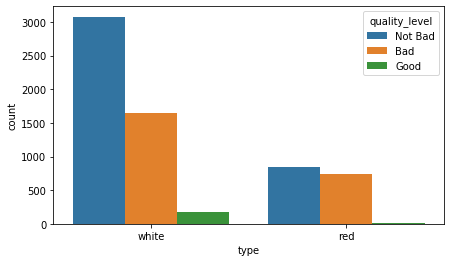

In [121]:
plt.figure(figsize=(7,4))

sns.countplot(x = 'type', hue = 'quality_level', data = wine, )
plt.show()
# 'low'=0, 'high'=1

In [122]:
# Create scaler
scaler = preprocessing.StandardScaler() 

# Transform the feature
num_col = wine.drop(["type", "quality_level"], axis=1).copy()
num_col = pd.DataFrame(scaler.fit_transform(num_col.values), columns=num_col.columns, index=num_col.index)
wine = pd.concat([wine["type"], num_col, wine["quality_level"]], axis=1)

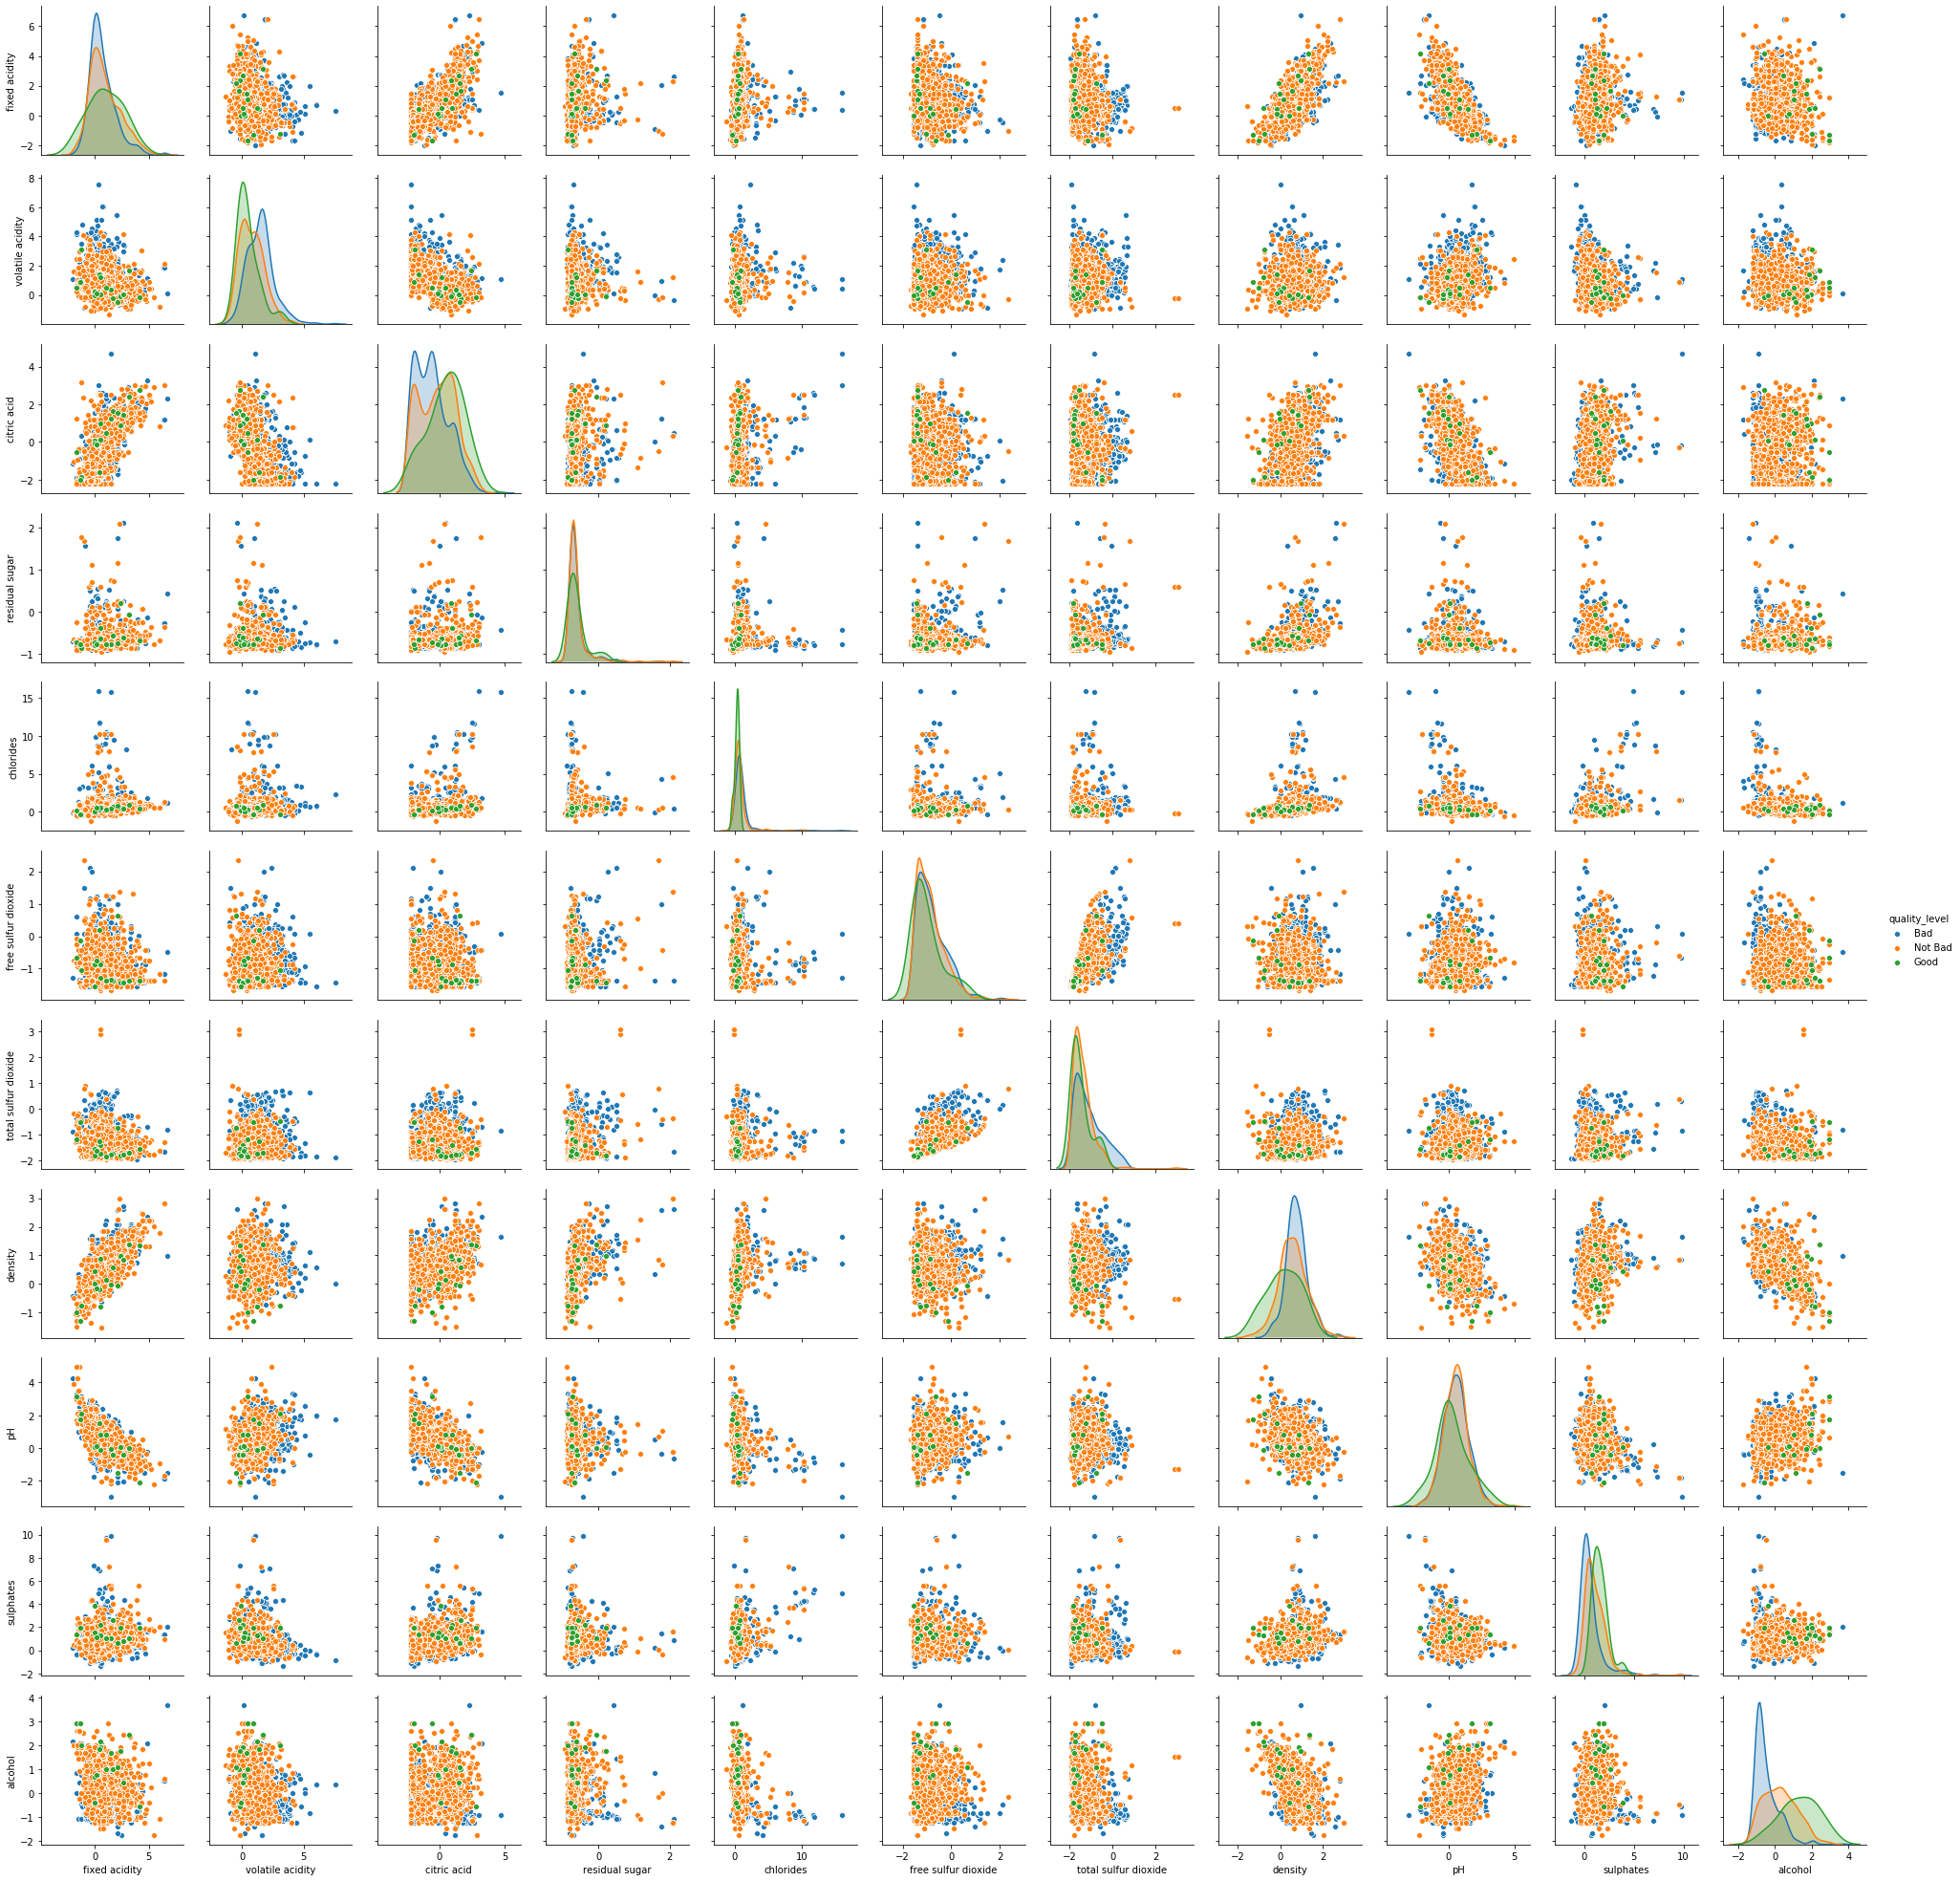

In [125]:
# correlation based on target values with scatter plot
sns.pairplot(wine[wine["type"]=="red"], kind="scatter", hue="quality_level", diag_kind="kde")
plt.show()

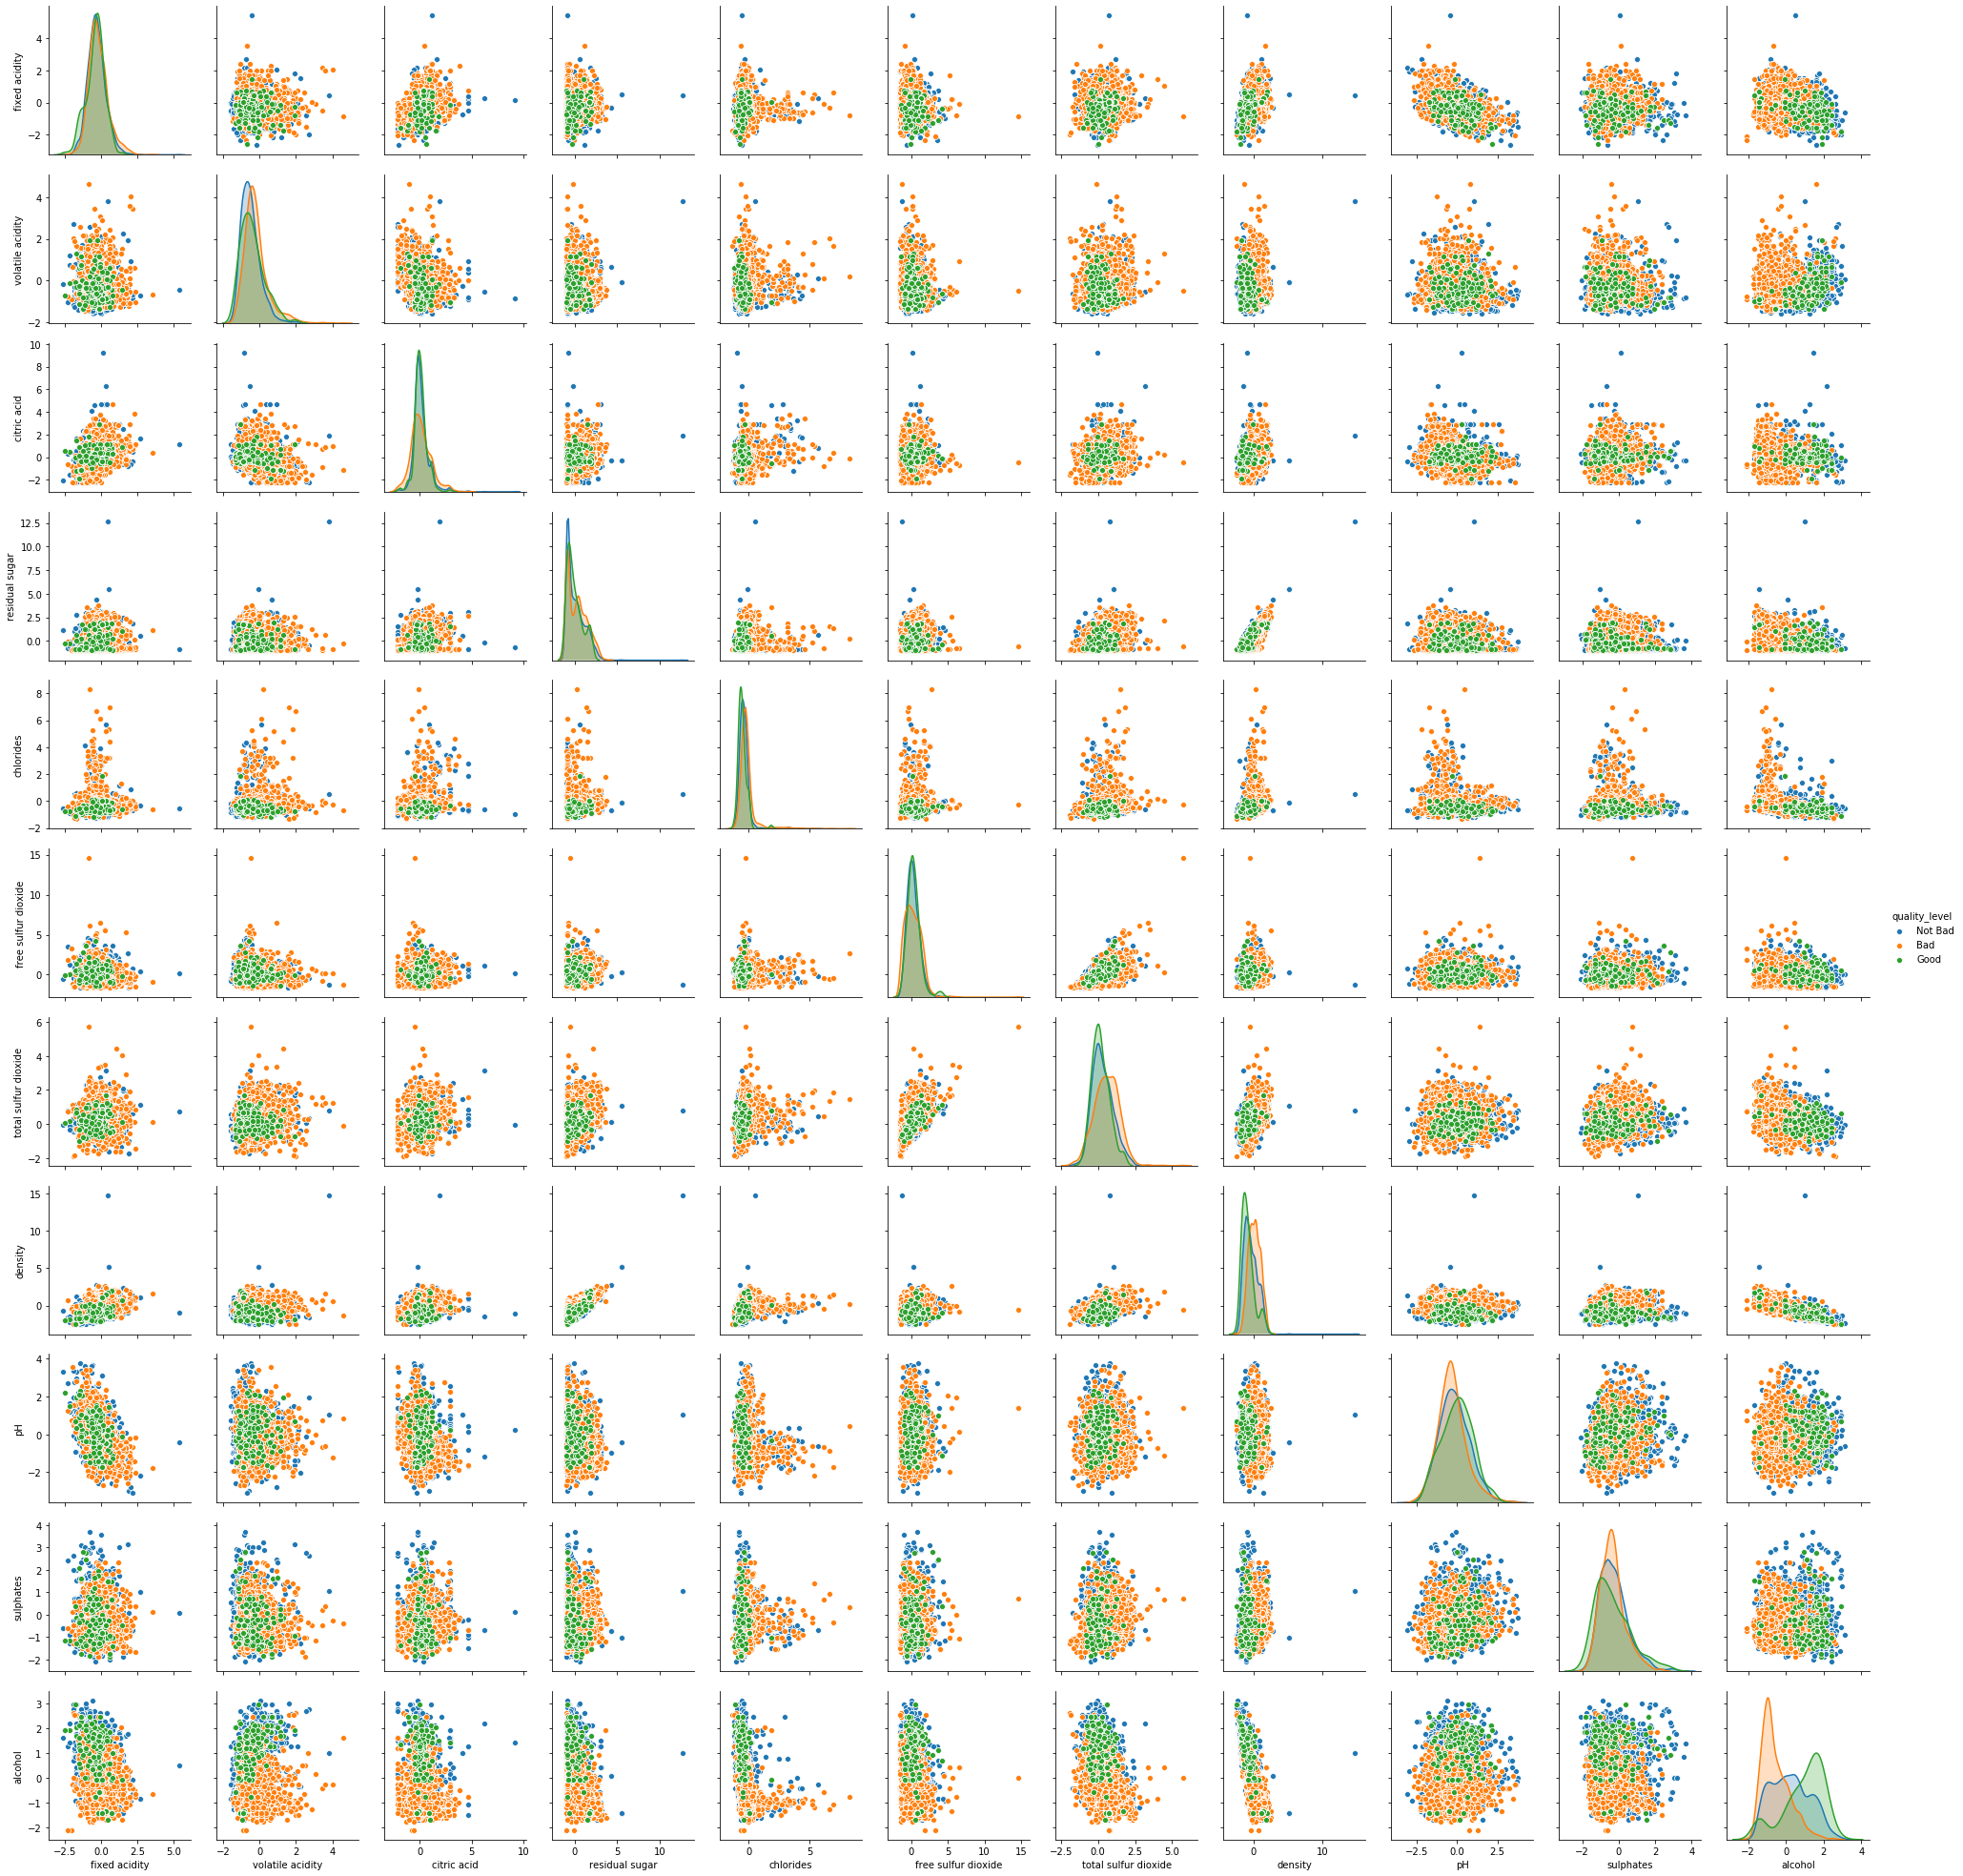

In [172]:
sns.pairplot(wine[wine["type"]=="white"], kind="scatter", hue="quality_level", diag_kind="kde")
plt.show()

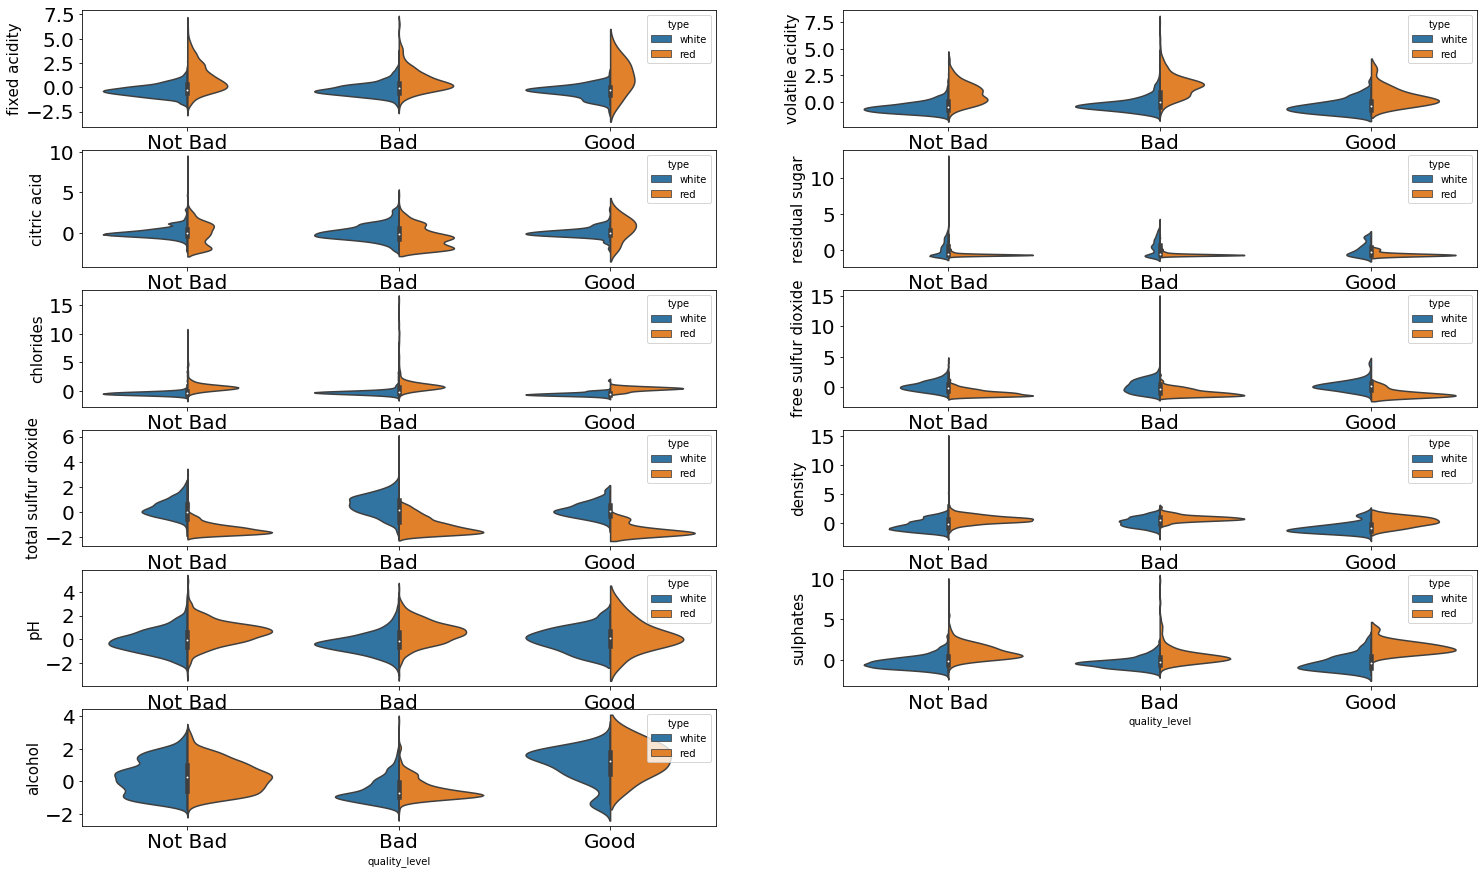

In [164]:
plt.figure(figsize=(25,15))
i=0
for col in wine.columns:
    if wine[col].dtypes!="object":
        plt.subplot(6,2,i)
        sns.violinplot(x='quality_level', y=col, hue='type', data=wine, split=True)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.ylabel('{}'.format(col), size = 15)
    i+=1    
    

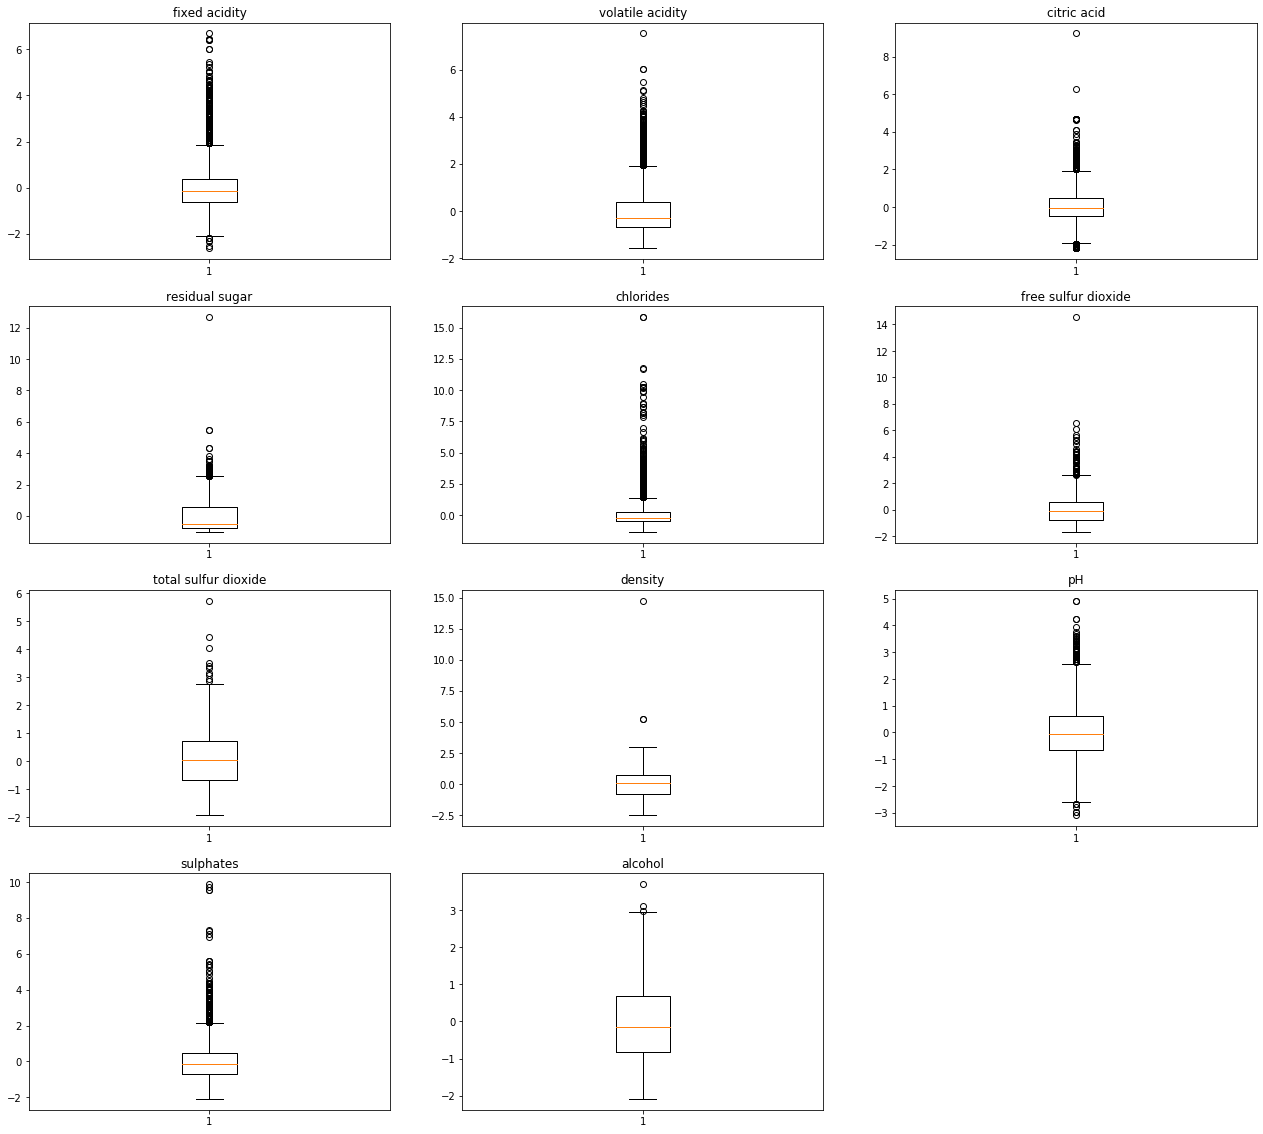

In [171]:
plt.figure(figsize=(22,20))
i=0
for col in wine.columns:
    if wine[col].dtypes!="object":
        plt.subplot(4, 3, i)
        plt.boxplot(wine[col])
        plt.title(col)
    i+=1

In [177]:
x = wine.drop(["quality_level", "type"], axis=1).values
y = wine['quality_level'].values.ravel()
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 100, perc = 90)
boruta_feature_selector.fit(x,y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=93, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x132B469E0,
                                          verbose=0, warm_start=Fals